Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

* Linear Regression

 * Singular LR

 * Multiple LR

 * Polynomial LR

* Logistic Regression

* Decision Tree

* Random Forest

Provide Evaluation reports for all models


In [65]:
# Import the CSV file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

appleDF = pd.read_csv('/content/drive/MyDrive/CPE019_prelim/apple_quality.csv')
appleDF.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [3]:
# Change labels of Quality from good and bad to 1 and 0 respectively for data analysis
appleDF["Quality"] = appleDF["Quality"].apply(lambda toLabel: 0 if toLabel == "bad" else 1)
appleDF.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [4]:
# Split into test and train dataframe
from sklearn.model_selection import train_test_split
columns = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
x = appleDF[list(columns)].values
y = appleDF["Quality"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

In [5]:
print('x_train size = ' + str(x_train.size / 7) +
      '\nx_test size = ' + str(x_test.size / 7) +
      '\ny_train size = ' + str(y_train.size) +
      '\ny_test size = ' + str(y_test.size))

x_train size = 2400.0
x_test size = 1600.0
y_train size = 2400
y_test size = 1600


# **Decision Tree**

In [103]:
# Decision Tree
from sklearn import tree
from six import StringIO

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(x, y)
with open("/content/drive/MyDrive/CPE019_prelim/apple.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

print(clf_train.score(x, y))

0.70475


The controrl score ratio for the 'all' dataset (unsplitted dataset) shows that the use of the Decision Tree model, gives a score of 70% accuracy between the model and the actual regression

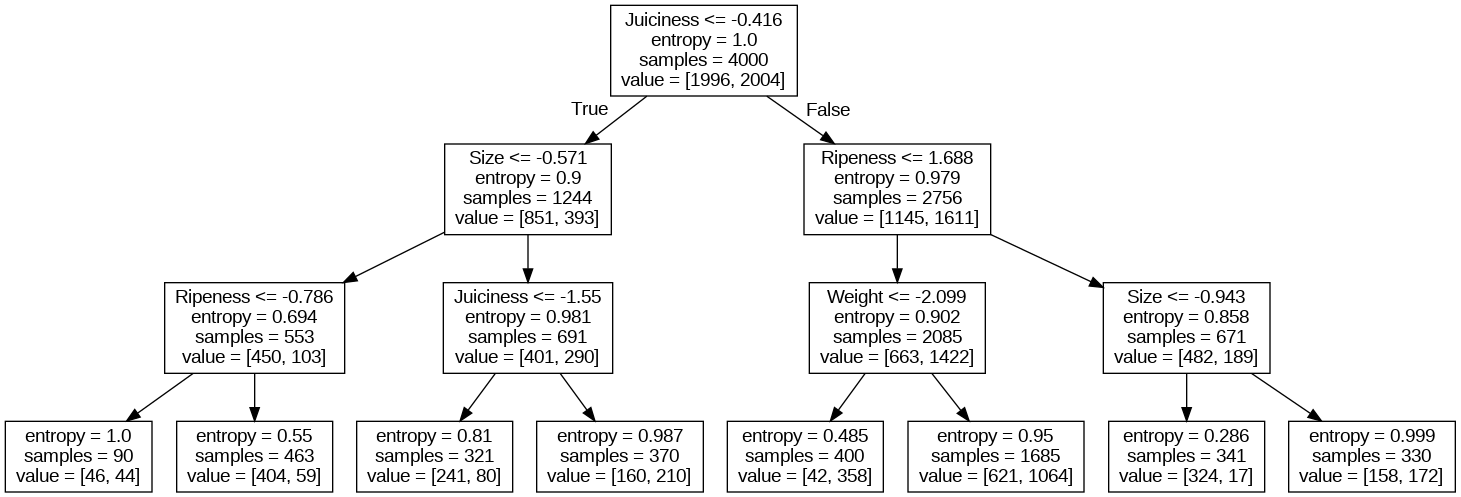

In [9]:
from IPython.display import Image
Image("/content/drive/MyDrive/CPE019_prelim/appleDT.png")

The Decision Tree of the Apple Quality dataset indicates that the root node in the Juiciness variable of the Apple indicating that it is the most important factor in indicating the quality of apples. With Size and Ripeness as the 2nd most important variables.

In [10]:
predict = clf_train.predict(x_test)
testFrame = pd.DataFrame({'Size': x_test[:, 0],
                          'Weight': x_test[:, 1],
                          'Sweetness': x_test[:, 2],
                          'Crunchiness': x_test[:, 3],
                          'Juiciness': x_test[:, 4],
                          'Ripeness': x_test[:, 5],
                          'Acidity': x_test[:, 6],
                          'Quality' : predict})
testFrame.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-0.882114,-0.630218,-2.350979,1.094072,-2.922815,0.701125,-1.187544,0
1,1.465806,-2.775201,0.992624,1.501921,-1.440469,3.638385,0.352909,1
2,-0.028301,0.673265,0.184109,1.272847,0.925253,0.288045,-1.992565,1
3,-0.984528,-2.011153,0.532582,0.218817,1.686125,0.184332,2.204142,1
4,1.259488,-0.557898,-2.578773,-0.488970,2.581219,-0.232605,0.489467,1
5,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997327,1
6,-0.629890,-1.400651,-0.048478,-0.408200,3.898747,-2.742770,0.308678,1
7,-0.408477,-1.150193,-3.031134,0.843985,-2.318131,2.477413,-1.101446,0
8,1.819744,-1.174086,-2.772288,-0.039636,-1.437848,1.648811,-1.098697,1
9,0.273757,-1.723821,-0.376107,0.817061,0.992272,-0.819167,1.293489,1


Here we apply the prediction model on the test dataset, showing the decision tree working as it is trained with all input variables in mind.

In [104]:
# All input variables used
train_score = str(clf_train.score(x_train , y_train))
test_score = str(clf_train.score(x_test , y_test))
print('Training score = '+ train_score+'\nTesting score = '+test_score)

Training score = 0.71375
Testing score = 0.69125


The training score shows a 71% accuracy between the model and training dataset and a testing score of 69% accuracy between the model and the testing dataset

###**Input Variable Count**

As the Decision Tree indicates the different variables that shows as significant indicators on the quality of apples, how can we say that ALL the input variables show significance between it and indicating the quality of the apples? We can answer this by testing every possible combination of input variables into the model

In [18]:
# Test function
from sklearn.model_selection import train_test_split
def test(col):
  X = appleDF[list(col)].values
  y = appleDF["Quality"].values
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)
  clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
  clf_train = clf_train.fit(X_train, y_train)
  train_score = clf_train.score(X_train,y_train)
  test_score = clf_train.score(X_test,y_test)
  return (train_score, test_score)

In [51]:
# Get scores for every possible input variable combination
import itertools
col = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
test_arr = []
for r in range(1, len(col) + 1):
    combinations = itertools.combinations(col, r)
    for combo in combinations:
      val = test(combo)
      test_arr.append([combo, val])
test_arr = np.array(test_arr, dtype="object")

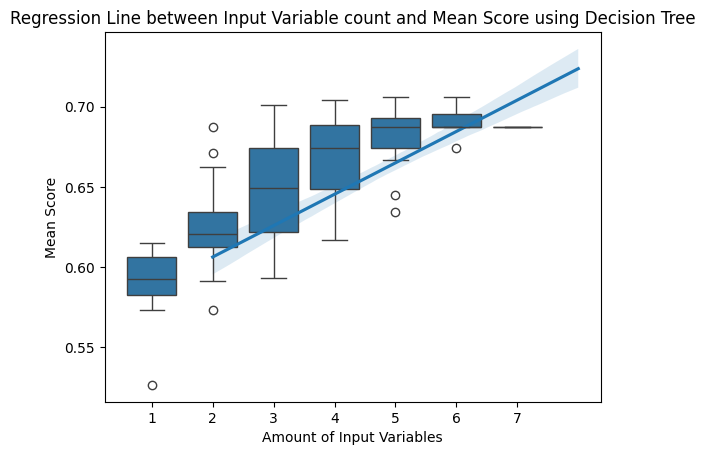

In [118]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

input_count, average = [], []
for i in test_arr:
  input_count.append(len(i[0]))
  average.append(np.average(i[1]))

dtResult = pd.DataFrame({'Amount':input_count,
                         'Mean':average})
fig, ax = plt.subplots()
sns.boxplot(x='Amount', y='Mean', data=dtResult, ax=ax)
sns.regplot(x='Amount',
            y='Mean',
            data=dtResult,
            ax = ax,
            scatter=False).set(xlabel='Amount of Input Variables',
                               ylabel='Mean Score',
                               title = 'Regression Line between Input Variable count and Mean Score using Decision Tree')
plt.show()

Based on the test and score results, there seems to be a very significant relationship between the mean score results of the Decision Tree model, and the amount of Input Variables used in the model training with the Apple quality dataset. In other words, as the amount of input variables are used in the model, the higher average score it gives.

Although this graph also shows another outlier which is that having 4, 5 or 6 input variables show higher average scores rather than using all input variables.

###**Visualizing the Data**

In [135]:
def viz_variable(var, title):
  input_count, average = [], []
  for i in test_arr:
    if var in i[0]:
        input_count.append(len(i[0]))
        average.append(np.average(i[1]))

  dtResult = pd.DataFrame({'Amount':input_count,
                          'Mean':average})
  fig, ax = plt.subplots()
  sns.boxplot(x='Amount', y='Mean', data=dtResult, ax=ax)
  sns.regplot(x='Amount',
              y='Mean',
              data=dtResult,
              ax = ax,
              scatter=False).set(xlabel='Amount of Input Variables',
                                ylabel='Mean Score',
                                title = title)

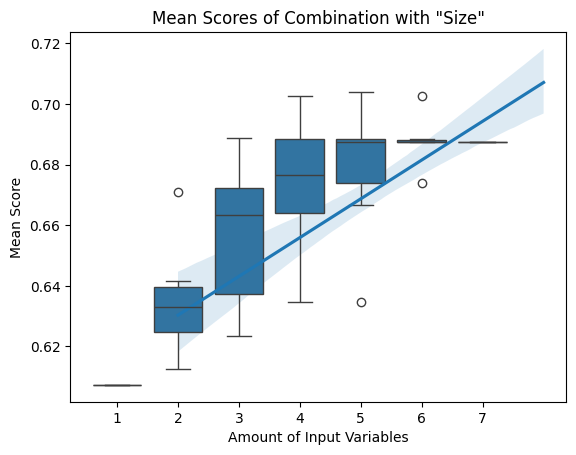

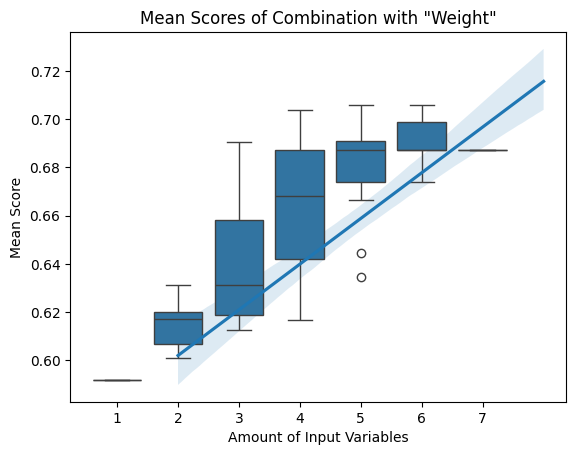

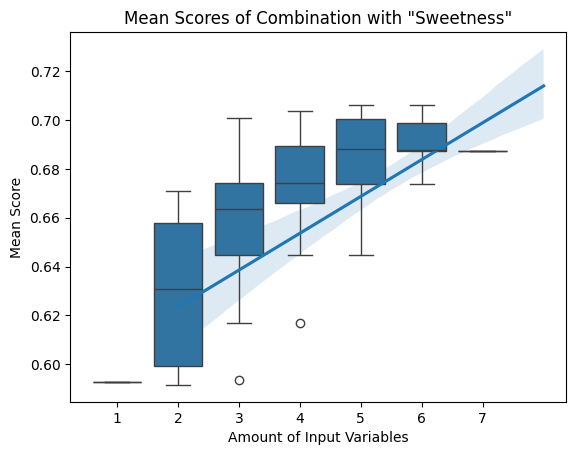

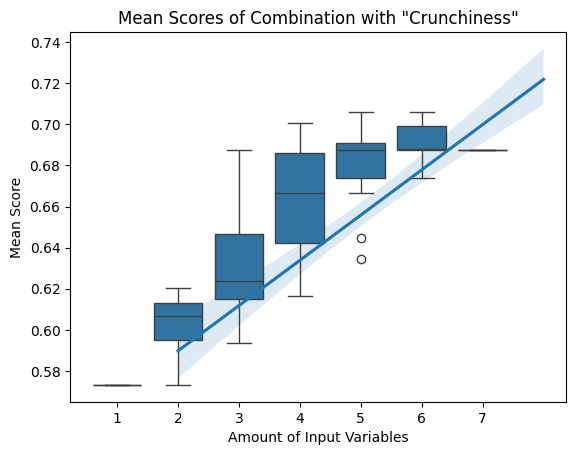

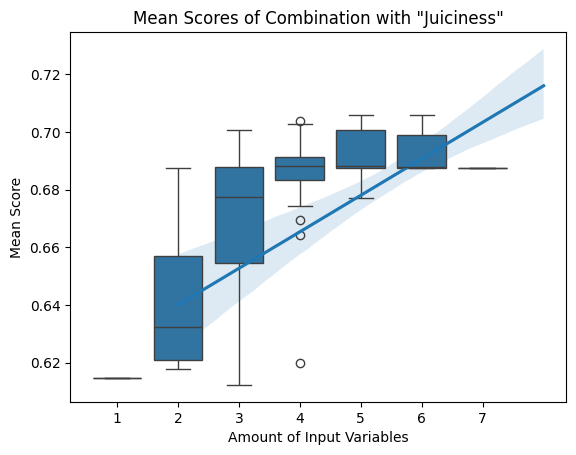

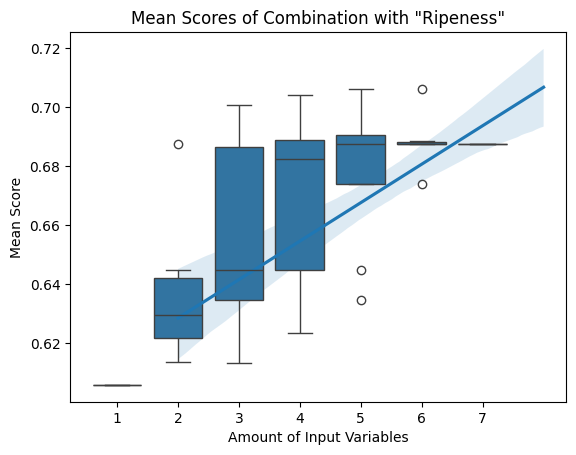

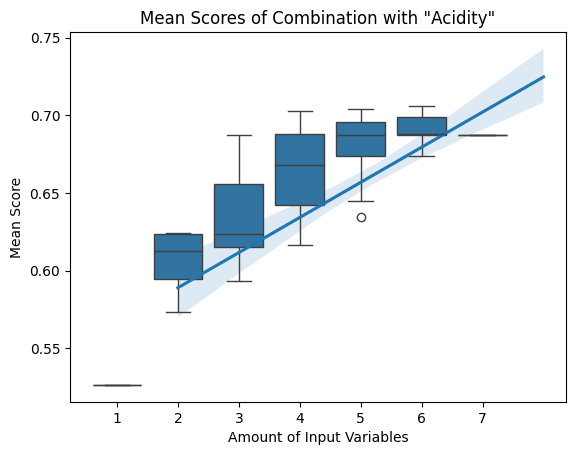

In [137]:
for i in col:
  text = str('Mean Scores of Combination with "'+i+'"')
  viz_variable(str(i), text)

plt.show()

# Logistic Regression

In [6]:
# Logistic Regression
from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(x_train , y_train)

train_score = str(logr.score(x_train , y_train))
test_score = str(logr.score(x_test , y_test))
print('Training score = '+ train_score+'\nTesting score = '+test_score)

Training score = 0.7583333333333333
Testing score = 0.73625


In [7]:
#Prediction model

predicted = logr.predict(x_test)
testFrame = pd.DataFrame({'Size': x_test[:, 0],
                          'Weight': x_test[:, 1],
                          'Sweetness': x_test[:, 2],
                          'Crunchiness': x_test[:, 3],
                          'Juiciness': x_test[:, 4],
                          'Ripeness': x_test[:, 5],
                          'Acidity': x_test[:, 6],
                          'Quality' : predicted})
testFrame.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-0.882114,-0.630218,-2.350979,1.094072,-2.922815,0.701125,-1.187544,0
1,1.465806,-2.775201,0.992624,1.501921,-1.440469,3.638385,0.352909,1
2,-0.028301,0.673265,0.184109,1.272847,0.925253,0.288045,-1.992565,1
3,-0.984528,-2.011153,0.532582,0.218817,1.686125,0.184332,2.204142,0
4,1.259488,-0.557898,-2.578773,-0.488970,2.581219,-0.232605,0.489467,1
5,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997327,1
6,-0.629890,-1.400651,-0.048478,-0.408200,3.898747,-2.742770,0.308678,1
7,-0.408477,-1.150193,-3.031134,0.843985,-2.318131,2.477413,-1.101446,0
8,1.819744,-1.174086,-2.772288,-0.039636,-1.437848,1.648811,-1.098697,0
9,0.273757,-1.723821,-0.376107,0.817061,0.992272,-0.819167,1.293489,1


Reference: https://www.w3schools.com/python/python_ml_logistic_regression.asp

# Random Forest

In [ ]:
#Random Forest